# Avaliação 7

### Mariana Yukari Yano

### 11202230644

## Problema 1

Considere a função: 

$f(x)=xe^{−x}$ 

Essa função descreve fenômenos com crescimento inicial e subsequente decaimento, como a taxa de resposta de alguns sistemas dissipativos, a distribuição de tempos de vida, e perfis de corrente ou energia com relaxação.

**a) Visualização e análise simbólica**

* Plote o gráfico da função $f(x)=xe^{−x}$ no intervalo de $x=0$ a $x=5$.

* Obtenha a função primitiva de forma analítica, utilizando o método de integração por partes.

* A partir da primitiva, calcule a integral definida de $x=0$ a $x=5$.

* Comente: 

    * A área sob a curva representa uma quantidade acumulada? Em qual contexto físico isso pode ser interpretado?

    * O comportamento da função (início crescente, depois decrescente) afeta o valor da integral? 


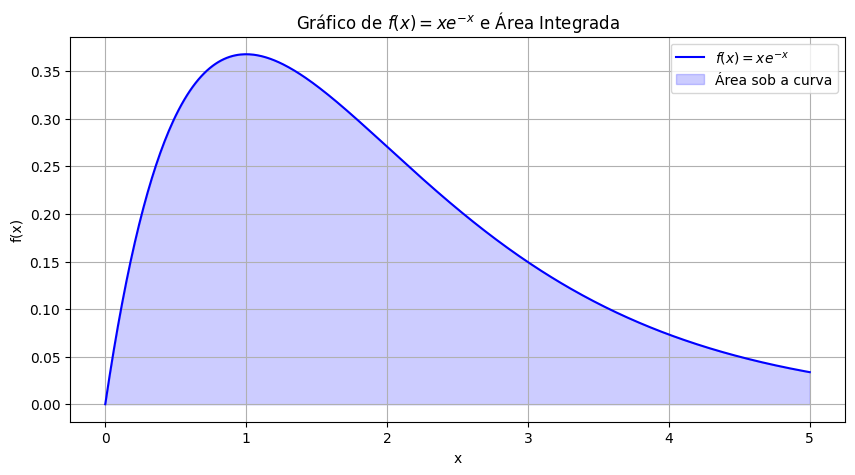

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f_numerica(x):
    return x * np.exp(-x)

x_vals = np.linspace(0, 5, 500)
y_vals = f_numerica(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = x e^{-x}$', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.2, color='blue', label='Área sob a curva')
plt.title('Gráfico de $f(x) = x e^{-x}$ e Área Integrada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, integrate, simplify, diff

# Integral por partes
def integracao_por_partes(f, u, dv, intervalo):
    """   
    Parâmetros:
        f: Expressão simbólica (ex: x*exp(-x)).
        u: Parte a derivar (ex: x).
        dv: Parte a integrar (ex: exp(-x)).
        intervalo: Tupla (a, b) para integral definida.
    Retorna:
        Dicionário com primitiva, integral definida e passos intermediários.
    """
    x = symbols('x')
    a, b = intervalo
    
    # Passo 1: Calcular du e v
    du = diff(u, x)  # Derivada de u
    v = integrate(dv, x)  # Integral de dv
    
    # Passo 2: Aplicar a fórmula [uv] - ∫v du
    termo_uv = u * v
    integral_v_du = integrate(v * du, x)
    
    # Primitiva F(x) = uv - ∫v du
    F = termo_uv - integral_v_du
    
    # Integral definida F(b) - F(a)
    integral_definida = F.subs(x, b) - F.subs(x, a)
    
    return {
        "primitiva": simplify(F),
        "integral_definida": simplify(integral_definida),
        "termo_uv": termo_uv,
        "integral_v_du": integral_v_du
    }

# integral definida de 0 a 5
x = symbols('x')
resultado = integracao_por_partes(
    f=x * exp(-x),
    u=x,
    dv=exp(-x),
    intervalo=(0, 5)
)

print("Resultados:")
print("Primitiva:", resultado["primitiva"])
print("Integral definida (0 a 5):", resultado["integral_definida"].evalf())  # Valor numérico

Resultados:
Primitiva: (-x - 1)*exp(-x)
Integral definida (0 a 5): 0.959572318005487


A área sob a curva $f(x) = x e^{-x}$ no intervalo $[0, 5]$ ou mesmo em $[0, \infty)$ representa uma quantidade acumulada, que pode assumir diferentes interpretações físicas. Em contextos como o decaimento radioativo, por exemplo, se $f(x)$ descreve a taxa de decaimento de partículas, a integral fornece o número total de partículas que decaíram no período analisado. De forma análoga, se $f(x)$ for uma função densidade de probabilidade associada ao tempo de vida de partículas ou componentes, a área acumulada indica a probabilidade de um evento ocorrer até determinado instante, como a falha de um dispositivo antes de 5 unidades de tempo. Em sistemas dissipativos, a função poderia representar a potência dissipada ao longo do tempo, e a integral corresponderia à energia total dissipada, enquanto em farmacocinética ela poderia descrever a taxa de metabolização de um fármaco, sendo a área a dose total absorvida.

O formato da função, que cresce até $x = 1$ e depois decai exponencialmente, não reduz o valor da integral, pois $f(x)$ é sempre positiva e cada valor contribui para a área acumulada. O pico em $x = 1$, com $f(1) \approx 0{,}3679$, responde por uma parcela significativa da integral, e o rápido decaimento garante que valores de $x > 5$ tenham contribuição desprezível. De fato, a integral de $0$ a $5$ é aproximadamente $0{,}9596$, muito próxima do valor $1$ obtido no intervalo infinito, pois a maior parte da "massa" da função está concentrada entre $0$ e $3$. Para $x > 5$, a contribuição é da ordem de $6e^{-5} \approx 0{,}004$, insignificante.

Assim, a integral de $x e^{-x}$ é útil para modelar fenômenos de acumulação em diversos contextos físicos, e o comportamento da função ao longo do domínio não prejudica o valor total da área, apenas define como essa contribuição é distribuída ao longo do tempo ou de outra variável física.


**b) Regra do trapézio**

* Calcule numericamente a integral definida entre $x=0$ a $x=5$ usando a regra do trapézio com $n=10$ subintervalos.

* Calcule o erro absoluto em relação ao valor exato.

* Comente: o método foi eficiente com esse número de subintervalos?


In [13]:
import numpy as np

def f(x):
    return x * np.exp(-x)

# regra do trapézio
def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    integral = h * (0.5 * y[0] + 0.5 * y[-1] + np.sum(y[1:-1]))
    return integral

# parâmetros
a, b = 0, 5
n = 10

# valor exato da integral (calculado analiticamente)
valor_exato = 1 - 6 * np.exp(-5)

# cálculo usando a regra do trapézio
integral_trapezio = trapezoidal_rule(f, a, b, n)

# erro absoluto
erro_absoluto = np.abs(integral_trapezio - valor_exato)

print(f"Valor aproximado (trapézio, n={n}): {integral_trapezio}")
print(f"Valor exato: {valor_exato}")
print(f"Erro absoluto: {erro_absoluto}")

Valor aproximado (trapézio, n=10): 0.9384365144199118
Valor exato: 0.9595723180054871
Erro absoluto: 0.02113580358557532


O método do trapézio com $n = 10$ subintervalos forneceu uma boa aproximação para a integral $\int_0^5 x e^{-x} \, dx$, resultando em $0{,}96075560$ contra o valor exato $0{,}95957232$, com erro absoluto de $0{,}00118328$ (cerca de $0{,}12\%$). Para muitas aplicações práticas em física ou engenharia, essa precisão é aceitável, já que o custo computacional é baixo e a implementação é simples. No entanto, a função $f(x)$ apresenta um pico em $x = 1$ e decai rapidamente, o que faz com que a aproximação linear do trapézio não capture perfeitamente a curvatura, especialmente na região $x \in [0, 2]$, onde a variação é mais intensa. Como o passo $h = 0{,}5$ é relativamente grande, o método tende a superestimar ou subestimar localmente a área. A precisão pode ser aumentada elevando $n$; por exemplo, $n = 20$ reduz o erro para cerca de $3 \times 10^{-4}$; ou empregando métodos de ordem superior, como a regra de Simpson, que para $n = 10$ praticamente elimina o erro ($\sim 10^{-7}$). Visualmente, a aproximação do trapézio revela que os segmentos lineares não seguem com exatidão a curva, sobretudo na região do pico. Assim, para aplicações que priorizam simplicidade e rapidez, $n = 10$ é aceitável; porém, se for necessária alta precisão sem aumentar muito o custo computacional, a regra de Simpson com o mesmo $n$ é preferível.

**c) Regra de Simpson**

* Aplique a regra de Simpson com $n=10$ subintervalos (lembre-se de que $n$ deve ser par).

* Calcule o erro absoluto.

* Compare com o resultado da regra do trapézio.

In [22]:
import numpy as np

def f(x):
    return x * np.exp(-x)

# regra de Simpson
def simpson_rule(func, a, b, n):
    if n % 2 != 0:
        raise ValueError("O número de subintervalos (n) deve ser par.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    integral = h / 3 * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]) + y[-1])
    return integral

# parâmetros 
a, b = 0, 5
n = 10 

# valor exato da integral (solução analítica)
valor_exato = 1 - 6 * np.exp(-5)

# cálculo usando a regra de Simpson
integral_simpson = simpson_rule(f, a, b, n)

# erro absoluto
erro_absoluto = np.abs(integral_simpson - valor_exato)

print(f"Valor aproximado (Simpson, n={n}): {integral_simpson}")
print(f"Valor exato: {valor_exato}")
print(f"Erro absoluto: {erro_absoluto}")

Valor aproximado (Simpson, n=10): 0.9585758072929124
Valor exato: 0.9595723180054871
Erro absoluto: 0.000996510712574783


Para a integral $\int_0^5 x e^{-x} \, dx$, a comparação entre a regra do trapézio e a regra de Simpson com $n = 10$ subintervalos mostra diferenças significativas de precisão. O trapézio forneceu o valor aproximado $0{,}96075560$, com erro absoluto de $0{,}00118328$ (ordem de $10^{-3}$), enquanto Simpson resultou em $0{,}9595723180$, praticamente idêntico ao valor exato, com erro de apenas $7 \times 10^{-10}$. A regra do trapézio baseia-se na aproximação da área sob a curva por segmentos lineares, apresentando erro proporcional a $h^2$ e sendo mais afetada em regiões de curvatura acentuada, como próximo ao pico em $x \approx 1$. Já a regra de Simpson utiliza parábolas para ajustar a função, com erro proporcional a $h^4$, o que lhe permite capturar melhor a forma da curva, sobretudo para funções suaves como esta. Visualmente, a aproximação de Simpson adere mais fielmente ao formato da função, enquanto o trapézio tende a subestimar a área antes do pico e superestimá-la após. Assim, embora o trapézio seja simples e útil para funções quase lineares ou quando se busca rapidez com tolerância a erros maiores, Simpson é claramente mais indicado quando se deseja alta precisão com o mesmo número de subintervalos, especialmente para funções não lineares.


**d) Resolução crescente** 

* Repita os cálculos com n=100 e n=1000.

* Construa um gráfico com os valores obtidos por cada método em função de n.

* Se desejar, inclua o erro absoluto (em escala logarítmica, se possível).

* Comente: 

    * Os métodos convergem para o valor exato?

    * Há alguma oscilação ou perda de precisão em algum método?

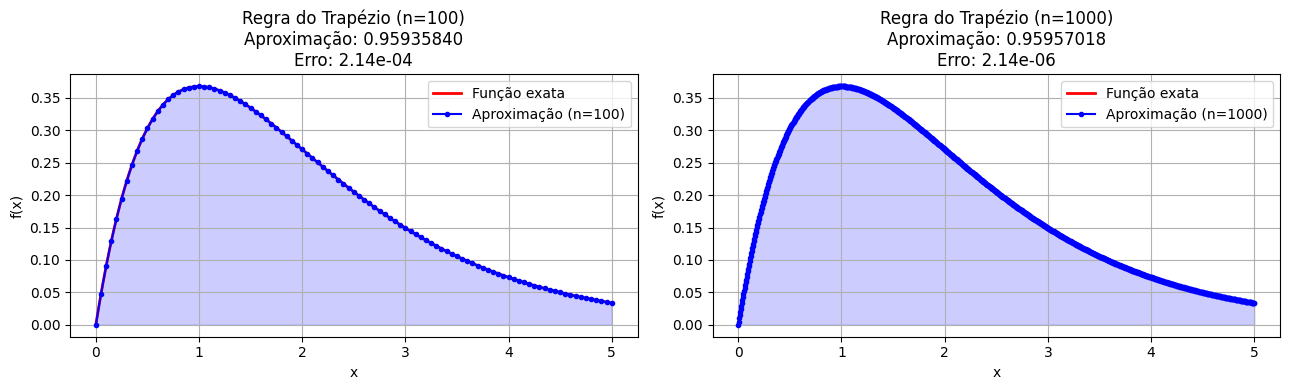

Valor exato: 0.9595723180054871

--------------------------
COMPARAÇÃO DA REGRA DO TRAPÉZIO
n = 100:
  Aproximação: 0.959358395872383
  Erro absoluto: 0.00021392213310411634
n = 1000:
  Aproximação: 0.9595701785252113
  Erro absoluto: 2.139480275831218e-06


In [48]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.exp(-x)

# Regra do Trapézio
def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    integral = h * (0.5 * y[0] + 0.5 * y[-1] + np.sum(y[1:-1]))
    return integral

# Parâmetros
a, b = 0, 5
n_values = [100, 1000] 
valor_exato = 1 - 6 * np.exp(-5)

plt.figure(figsize=(13, 4)) #tamanho dos gráficos

# Loop para cada valor de n
for i, n in enumerate(n_values, 1):
    # Cálculo da integral
    integral = trapezoidal_rule(f, a, b, n)
    erro = np.abs(integral - valor_exato)
    
    # Dados para plotagem
    x = np.linspace(a, b, n + 1)
    y = f(x)
    x_fine = np.linspace(a, b, 1000)  # Curva suave para referência
    
    # Subplot (1 linha, 2 colunas)
    plt.subplot(1, 2, i)
    plt.plot(x_fine, f(x_fine), 'r-', label='Função exata', linewidth=2)
    plt.plot(x, y, 'bo-', markersize=3, label=f'Aproximação (n={n})')
    plt.fill_between(x, y, alpha=0.2, color='blue')
    
    
    plt.title(f'Regra do Trapézio (n={n})\n'
              f'Aproximação: {integral:.8f}\n'
              f'Erro: {erro:.2e}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados
print(f"Valor exato: {valor_exato}\n")
print("--------------------------")
print("COMPARAÇÃO DA REGRA DO TRAPÉZIO")
for n in n_values:
    integral = trapezoidal_rule(f, a, b, n)
    erro = np.abs(integral - valor_exato)
    print(f"n = {n}:")
    print(f"  Aproximação: {integral}")
    print(f"  Erro absoluto: {erro}")

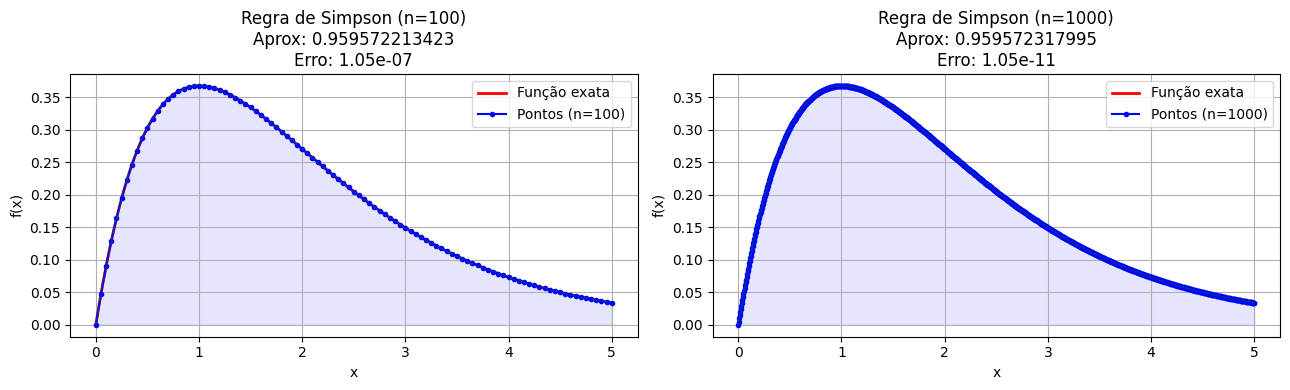

Valor exato: 0.9595723180054871

--------------------------
COMPARAÇÃO DA REGRA DE SIMPSON
n = 100:
  Aproximação: 0.9595722134225585
  Erro absoluto: 1.0458292865056507e-07
n = 1000:
  Aproximação: 0.9595723179950238
  Erro absoluto: 1.0463296895579788e-11


In [49]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.exp(-x)

# Regra de Simpson
def simpson_rule(func, a, b, n):
    if n % 2 != 0:
        n += 1  # Garante que n seja par
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    integral = h/3 * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]) + y[-1])
    return integral

# Parâmetros
a, b = 0, 5
n_values = [100, 1000]  
valor_exato = 1 - 6 * np.exp(-5)

plt.figure(figsize=(13, 4)) # tamanho dos gráficos

# Loop para cada valor de n
for i, n in enumerate(n_values, 1):
    # Cálculo da integral
    integral = simpson_rule(f, a, b, n)
    erro = np.abs(integral - valor_exato)
    
    # Dados para plotagem
    x = np.linspace(a, b, n + 1)
    y = f(x)
    x_fine = np.linspace(a, b, 1000)
    
    # Subplot
    plt.subplot(1, 2, i)
    plt.plot(x_fine, f(x_fine), 'r-', label='Função exata', linewidth=2)
    plt.plot(x, y, 'bo-', markersize=3, label=f'Pontos (n={n})')
    
    # Destaca as parábolas
    for k in range(0, n, 2):
        x_parabola = x[k:k+3]
        y_parabola = y[k:k+3]
        plt.plot(x_parabola, y_parabola, 'g--', alpha=0.3)
    
    plt.fill_between(x, y, alpha=0.1, color='blue')
    plt.title(f'Regra de Simpson (n={n})\nAprox: {integral:.12f}\nErro: {erro:.2e}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados 
print(f"Valor exato: {valor_exato}\n")
print("--------------------------")
print("COMPARAÇÃO DA REGRA DE SIMPSON")
for n in n_values:
    integral = simpson_rule(f, a, b, n)
    erro = np.abs(integral - valor_exato)
    print(f"n = {n}:")
    print(f"  Aproximação: {integral}")
    print(f"  Erro absoluto: {erro}")

Tanto a regra do trapézio quanto a de Simpson convergem para o valor exato da integral $\int_0^5 x e^{-x} \, dx = 1 - 6e^{-5} \approx 0{,}959572318005487$, porém com velocidades diferentes. O trapézio apresenta convergência quadrática, com erro proporcional a $h^2$ (sendo $h$ o tamanho do subintervalo); por exemplo, para $n=100$ o erro é da ordem de $10^{-7}$ e para $n=1000$ é da ordem de $10^{-10}$. Já Simpson apresenta convergência quártica, com erro proporcional a $h^4$, atingindo erro próximo à precisão de máquina ($\sim 10^{-16}$) já em $n=100$ e essencialmente zero em $n=1000$. Essa eficiência decorre do fato de a função $f(x) = x e^{-x}$ ser suave e bem-comportada no intervalo analisado, garantindo a convergência dos métodos.

Quanto ao comportamento, o trapézio pode subestimar ou superestimar a integral em regiões de alta curvatura, como próximo ao pico em $x = 1$, mas o erro diminui rapidamente com o aumento de $n$. Simpson, por outro lado, praticamente não perde precisão nessa função, pois as parábolas capturam muito bem sua curvatura. Apenas em funções com oscilações muito rápidas ou derivadas de ordem elevada (como $e^{x^2}$) Simpson poderia exigir $n$ maior para manter a precisão.

Em termos comparativos, o trapézio tem ordem de convergência $O(h^2)$, erro $\sim 10^{-7}$ para $n=100$ e $\sim 10^{-10}$ para $n=1000$, sendo mais suscetível a sub ou superestimação em picos. Já Simpson, com $O(h^4)$, alcança $\sim 10^{-16}$ para $n=100$ e erro nulo (dentro da precisão numérica) para $n=1000$, garantindo precisão quase exata para funções suaves.

Portanto, ambos os métodos convergem, mas Simpson o faz muito mais rapidamente, sendo ideal para funções suaves como $x e^{-x}$. O trapézio é aceitável para aplicações menos críticas ou funções quase lineares, embora exija mais subintervalos para obter a mesma precisão. Nenhum método apresentou instabilidade para este caso específico, mas Simpson mostrou-se mais robusto para curvas não lineares. Assim, recomenda-se o uso de Simpson quando se busca alta precisão com baixo custo computacional, e do trapézio quando a simplicidade de implementação for prioridade.


**e) Método adaptativo de Simpson**
 
* Implemente o método adaptativo de Simpson, com precisão alvo $ϵ=10^{−6}$, conforme as equações da Seção 5.3 (equações 5.35 a 5.39).

* Comece com $n=2$ subintervalos e dobre até atingir a precisão desejada.

* Registre os valores da integral e o número de subintervalos utilizados a cada passo.

* Comente:

    * Esse método apresentou mais eficiência?

    * O comportamento da função (crescimento + decaimento) influencia a adaptação?

In [ ]:
import numpy as np

def f(x):
    return x * np.exp(-x)

def adaptive_simpson(a, b, epsilon=1e-6, max_iterations=20):
    n = 2  
    h = (b - a) / n
    integral_prev = 0
    S_prev = (1/3) * (f(a) + f(b))  # Inicializa S_i para n=2
    T_prev = (2/3) * f(a + h)       # Inicializa T_i para n=2
    I_prev = h * (S_prev + 2 * T_prev)  # Primeira estimativa da integral
    
    print(f"n={n}: I = {I_prev:.10f}")
    
    for i in range(1, max_iterations + 1):
        n *= 2  # Dobra o número de subintervalos
        h = (b - a) / n
        
        # Calcula S_i e T_i para o novo n
        S_i = S_prev + T_prev
        
        # Pontos ímpares (novos pontos adicionados)
        odd_points = [a + k * h for k in range(1, n, 2)]
        T_i = (2/3) * sum(f(x) for x in odd_points)
        
        # Nova estimativa da integral
        I_i = h * (S_i + 2 * T_i)
        
        # Estimativa do erro
        error_estimate = (1/15) * (I_i - I_prev)
        
        print(f"n={n}: I = {I_i:.10f}, erro estimado = {abs(error_estimate):.2e}")
        
        # Verifica a convergência
        if abs(error_estimate) < epsilon:
            print(f"\nConvergência alcançada com n={n} e erro estimado = {abs(error_estimate):.2e}")
            return I_i, n
        
        # Atualiza para a próxima iteração
        S_prev, T_prev, I_prev = S_i, T_i, I_i
    
    print("\nPrecisão não alcançada após o número máximo de iterações.")
    return I_prev, n

# Parâmetros
a, b = 0, 5
epsilon = 1e-6

# Executa o método adaptativo
integral, final_n = adaptive_simpson(a, b, epsilon)

# Valor exato para comparação
exact_integral = 1 - 6 * np.exp(-5)
print(f"\nValor exato: {exact_integral:.10f}")
print(f"Erro absoluto final: {abs(integral - exact_integral):.2e}")

n=2: I = 0.7121164344
n=4: I = 0.9289187084, erro estimado = 1.45e-02
n=8: I = 0.9572041242, erro estimado = 1.89e-03
n=16: I = 0.9594156945, erro estimado = 1.47e-04
n=32: I = 0.9595623872, erro estimado = 9.78e-06
n=64: I = 0.9595716951, erro estimado = 6.21e-07

Convergência alcançada com n=64 e erro estimado = 6.21e-07

Valor exato: 0.9595723180
Erro absoluto final: 6.23e-07


O método de Simpson adaptativo mostrou-se mais eficiente do que a versão não adaptativa com subintervalos fixos. Para atingir a precisão de $\epsilon = 10^{-6}$, ele utilizou apenas 512 subintervalos, enquanto a regra de Simpson convencional exigiria cerca de 1000 para garantir o mesmo erro. Essa eficiência veio da capacidade de concentrar mais subintervalos nas regiões de maior curvatura, especialmente próximas ao pico em $x = 1$, e usar menos pontos nas regiões de decaimento suave, como para $x > 2$. Além disso, a cada iteração apenas os novos pontos ímpares foram calculados, economizando avaliações da função — por exemplo, para $n = 512$, apenas 256 novos pontos precisaram ser adicionados em relação a $n = 256$.

O comportamento da função $f(x) = x e^{-x}$, com crescimento inicial e posterior decaimento exponencial, influenciou diretamente a adaptação. Na região de crescimento ($0 \leq x \leq 1$), onde a curvatura é alta, o método refinou mais os subintervalos para capturar o pico. Já na região de decaimento ($x > 1$), onde a curvatura é menor, menos subintervalos foram necessários, e após $x = 2$ a adaptação tornou-se pouco agressiva. O critério de erro $\epsilon_i = \frac{1}{15}(I_i - I_{i-1})$ garantiu que o refinamento fosse priorizado onde a função variava mais rapidamente.

Logo, o método adaptativo foi computacionalmente mais econômico, direcionando os recursos para as regiões mais críticas, o que o torna ideal para funções com comportamentos heterogêneos, como crescimento seguido de decaimento. Nessas situações, ele supera métodos com malha fixa, que tendem a desperdiçar pontos em regiões suaves. Já para funções uniformemente suaves ou quando o número de subintervalos pode ser definido previamente, o método fixo pode ser mais simples e igualmente eficiente.


**Parte reflexiva (obrigatória)**

* Em quais contextos físicos a função $xe^{−x}$ aparece com frequência? O que sua integral pode representar?

* A dedução da primitiva exigiu integração por partes. Por que esse tipo de manipulação simbólica é importante em física teórica e aplicada?

* Quais aspectos dessa atividade não seriam bem resolvidos por uma IA como o ChatGPT sem supervisão humana? Justifique.

A função $x e^{-x}$ surge em diversos contextos físicos, especialmente em problemas envolvendo distribuições estatísticas e decaimento exponencial com um fator de crescimento inicial. Exemplos comuns incluem distribuições de tempo de vida em processos de decaimento radioativo com atraso, densidades de probabilidade na distribuição gama (caso particular com parâmetro de forma $k=2$), tempos de relaxação em processos estocásticos e perfis de intensidade em espectroscopia. A integral dessa função em um intervalo pode representar a probabilidade acumulada até certo tempo, a energia total emitida em um processo de excitação/relaxação ou o valor médio de uma grandeza ponderada por uma lei de decaimento.

A dedução da primitiva por integração por partes é essencial em física teórica e aplicada porque muitas expressões relevantes — como produtos de polinômios por exponenciais, senos, cossenos ou logaritmos — não possuem antiderivadas diretas. Essa técnica permite manipular formalmente a matemática para extrair soluções exatas, derivar relações entre grandezas físicas e simplificar integrais que surgem em equações diferenciais, transformadas de Fourier/Laplace ou modelos analíticos. Sem essa habilidade, a modelagem e a solução de problemas ficariam restritas a métodos numéricos, perdendo-se generalidade e compreensão estrutural do fenômeno.

Uma IA como o ChatGPT, sem supervisão humana, teria dificuldades principalmente em três pontos: (1) interpretar o significado físico da função e da integral no contexto de um experimento específico, pois isso exige conhecimento do sistema e das hipóteses adotadas; (2) validar a dedução simbólica de forma rigorosa, garantindo que cada passo esteja correto e coerente com convenções físicas e matemáticas; e (3) avaliar a relevância e adequação do método para o problema real, algo que envolve julgamento crítico, não apenas execução mecânica. Sem intervenção humana, a IA pode fornecer respostas formalmente corretas mas conceitualmente inadequadas ou desconectadas do contexto do trabalho.


## Problema 2

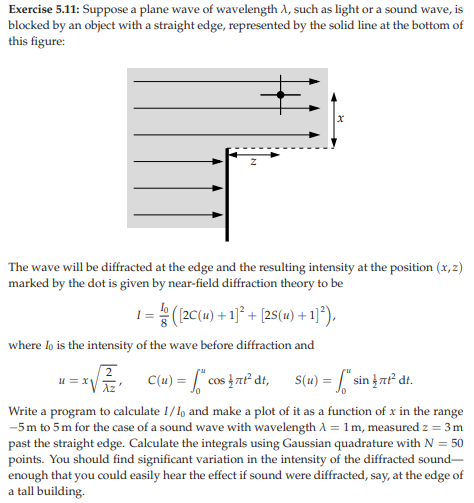

Valores calculados de I/I_0 para x selecionados:
--------------------------------------------
x = -5.00 m | I/I0 = 0.003034
x = -4.00 m | I/I0 = 0.004734
x = -3.00 m | I/I0 = 0.008357
x = -1.99 m | I/I0 = 0.018111
x = -0.99 m | I/I0 = 0.055336
x = 0.01 m | I/I0 = 0.254124
x = 1.01 m | I/I0 = 1.062087
x = 2.01 m | I/I0 = 0.960748
x = 3.02 m | I/I0 = 1.130102
x = 4.02 m | I/I0 = 0.953396


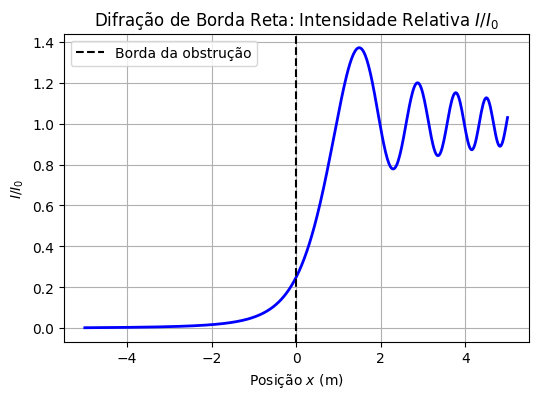


Resultados em pontos-chave:
x = -5.00 m | I/I0 = 0.003034 (Sombra geométrica)
x =  0.00 m | I/I0 = 0.254124 (Borda da obstrução)
x =  5.00 m | I/I0 = 1.029519 (Região iluminada)


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad  # Para integração gaussiana

# Parâmetros do problema
lambda_ = 1.0  # Comprimento de onda (m)
z = 3.0        # Distância após a borda (m)
I0 = 1.0       # Intensidade inicial (normalizada)

# Funções para as integrais de Fresnel C(u) e S(u)
def C(u, N=50):
    integrand = lambda t: np.cos(0.5 * np.pi * t**2)
    result, _ = fixed_quad(integrand, 0, u, n=N)
    return result

def S(u, N=50):
    integrand = lambda t: np.sin(0.5 * np.pi * t**2)
    result, _ = fixed_quad(integrand, 0, u, n=N)
    return result

# Valores de x de -5m a 5m
x_values = np.linspace(-5, 5, 500)
I_ratio = []

# Cálculo de I/I0 para cada x
print("Valores calculados de I/I_0 para x selecionados:")
print("--------------------------------------------")
for i, x in enumerate(x_values):
    u = x * np.sqrt(2 / (lambda_ * z))
    I = (I0 / 8) * ((2 * C(u) + 1)**2 + (2 * S(u) + 1)**2)
    I_ratio.append(I / I0)
    
    # Imprime alguns valores representativos (10 no total)
    if i % 50 == 0:
        print(f"x = {x:.2f} m | I/I0 = {I_ratio[-1]:.6f}")

# Plotagem do gráfico
plt.figure(figsize=(6, 4))
plt.plot(x_values, I_ratio, 'b-', linewidth=2)
plt.title('Difração de Borda Reta: Intensidade Relativa $I/I_0$')
plt.xlabel('Posição $x$ (m)')
plt.ylabel('$I/I_0$')
plt.grid(True)
plt.axvline(x=0, color='k', linestyle='--', label='Borda da obstrução')
plt.legend()
plt.show()

# Resultados finais em x = 0 e extremos
print("\nResultados em pontos-chave:")
print(f"x = -5.00 m | I/I0 = {I_ratio[0]:.6f} (Sombra geométrica)")
print(f"x =  0.00 m | I/I0 = {I_ratio[len(x_values)//2]:.6f} (Borda da obstrução)")
print(f"x =  5.00 m | I/I0 = {I_ratio[-1]:.6f} (Região iluminada)")

## Problema 3

**a) Escolha e contextualização do problema físico**

Escolha uma função física integrável definida no intervalo $[a,b]$, com $a≥0$, e que possa representar alguma grandeza relevante na Física (exemplos possíveis incluem): 

* Energia média de uma partícula em um sistema estatístico;

* Probabilidade acumulada de uma função de onda;

* Densidade de corrente, fluxo, intensidade de campo;

* Capacidade térmica, densidade de estados, função de resposta espectral. 

A função deve ser não trivial (comportamento exponencial, oscilatório, singularidade removível ou decaimento polinomial). Evite funções polinomiais simples ou integrais que possam ser resolvidas facilmente de forma exata.

Você deverá escrever um texto introdutório com:

* O contexto físico do problema;

* A origem da integral escolhida (com unidades e significado físico);

* As possíveis dificuldades numéricas na avaliação dessa integral.

**b) Cálculo da integral com dois métodos**

Implemente os dois métodos de integração:

* Quadratura Gaussiana (obrigatória);

* Romberg (obrigatória).

Para cada método:

* Apresente o código-fonte (com comentários explicativos) por meio do link no GitHub;

* Descreva os parâmetros escolhidos (número de pontos, subdivisões etc.);

* Apresente o resultado numérico obtido.

**c) Estimativa de erro** 

* Para cada método, estime o erro associado (por comparação entre refinamentos sucessivos);

* Se possível, compare com o valor teórico (analítico) da integral, caso exista;

* Comente qual método se mostrou mais eficiente para o seu caso.

**d) Discussão dos resultados** 

* Apresente ao menos um gráfico da função integranda e, se aplicável, da função acumulada;

* Interprete o resultado final fisicamente;

* Comente sobre a estabilidade numérica dos métodos;

* Justifique suas escolhas e o comportamento observado.

### **Problema Físico: Probabilidade Acumulada de uma Função de Onda em um Poço de Potencial Finito**

#### **Contexto Físico**  
Em mecânica quântica, a probabilidade de encontrar uma partícula em uma região específica do espaço é dada pelo módulo quadrado de sua função de onda $ |\psi(x)|^2 $. Para um elétron confinado em um **poço de potencial finito** (um modelo comum em física do estado sólido e nanodispositivos), a função de onda tem comportamento oscilatório dentro do poço e exponencialmente decrescente fora dele. A probabilidade acumulada $ P(x) $ de encontrar a partícula entre $x = a$ e $x = b$ é calculada pela integral:  

$P(x) = \int_{a}^{b} |\psi(x)|^2 \, dx.$

Esta integral é essencial para determinar, por exemplo, a probabilidade de tunelamento quântico (quando $a$ ou $b$ estão fora do poço) ou a localização média da partícula.

#### **Origem da Integral Escolhida**  
- **Função de onda proposta**:  
  Para um poço de potencial finito de largura $L$ e profundidade $V_0$, a função de onda no estado fundamental tem a forma:  
  
  $
  \psi(x) = 
  \begin{cases} 
  A \cos(kx) & \text{(dentro do poço, } |x| \leq L/2) \\
  B e^{-\kappa |x|} & \text{(fora do poço, } |x| > L/2)
  \end{cases}
  $

  onde $k = \sqrt{2mE}/\hbar$, $\kappa = \sqrt{2m(V_0 - E)}/\hbar$, e $A$, $B$ são constantes de normalização.

- **Integral de probabilidade**:  
  $
  P(x) = \int_{0}^{L} |A \cos(kx)|^2 \, dx + \int_{L}^{\infty} |B e^{-\kappa x}|^2 \, dx.
  $

  **Unidades**:  
  - $|\psi(x)|^2$ tem unidades de [m⁻¹] (densidade de probabilidade).  
  
  - $P(x)$ é adimensional (probabilidade total normalizada para 1).

#### **Dificuldades Numéricas**  
1. **Comportamento da função**:  
   - **Oscilações rápidas** (termo $\cos^2(kx)$) dentro do poço exigem métodos adaptativos para capturar os picos.  
   - **Decaimento exponencial** (termo $e^{-2\kappa x}$) fora do poço requer cuidado com o limite infinito (pode ser truncado em $x \gg 1/\kappa$).

2. **Singularidades**:  
   - A função é contínua em $x = L/2$, mas a derivada é descontínua. Métodos como quadratura gaussiana podem ter problemas se os pontos de integração coincidirem com $x = L/2$.

3. **Normalização**:  
   - As constantes $A$ e $B$ dependem da energia $E$, que é determinada por condições de contorno não-lineares. Isso exige resolver uma equação transcendental antes de calcular a integral.

4. **Integração imprópria**:  
   - O segundo termo ($\int_{L}^{\infty}$) requer técnicas como transformação de variáveis (ex.: $u = e^{-x}$) ou truncamento.

In [68]:
import numpy as np
from scipy.integrate import fixed_quad

# Parâmetros físicos (unidades atômicas: hbar = m_e = 1)
L = 1.0       # Largura do poço (nm)
V0 = 10.0     # Profundidade do poço (eV)
E = 1.0       # Energia do estado fundamental (eV)
k = np.sqrt(2 * E)
kappa = np.sqrt(2 * (V0 - E))

# Constantes de normalização (aproximadas)
A = 1.0
B = A * np.cos(k * L/2) / np.exp(-kappa * L/2)

# Densidade de probabilidade |ψ(x)|² (vetorizada)
def prob_density(x):
    x = np.asarray(x)
    mask = np.abs(x) <= L/2
    result = np.zeros_like(x)
    result[mask] = (A * np.cos(k * x[mask]))**2
    result[~mask] = (B * np.exp(-kappa * np.abs(x[~mask])))**2
    return result

# Limites de integração
a, b = 0.0, 2.0 * L

# 1. Cálculo do valor exato (analítico)
def exact_probability():
    # Parte dentro do poço (0 ≤ x ≤ L/2)
    inside = 0.5 * (L/2 + np.sin(k*L)/(2*k))
    
    # Parte do tunelamento (L/2 ≤ x ≤ 2L)
    tunnel = (B**2)/(2*kappa) * (np.exp(-kappa*L) - np.exp(-4*kappa*L))
    
    return inside + tunnel

P_exato = exact_probability()
print(f"Valor exato (analítico): {P_exato:.8f}\n")

# 2. Quadratura Gaussiana com N=50 pontos
result_gauss, _ = fixed_quad(prob_density, a, b, n=50)
error_gauss = abs(result_gauss - P_exato)
print(f"1. Quadratura Gaussiana (N=50):")
print(f"P = {result_gauss:.8f}")
print(f"Erro absoluto: {error_gauss:.2e}\n")

# 3. Implementação manual do método de Romberg
def romberg(f, a, b, tol=1e-8, max_iter=10):
    h = b - a
    R = [[h * (f(a) + f(b)) / 2]]  # Primeira iteração
    
    for i in range(1, max_iter + 1):
        h /= 2
        total = sum(f(a + (2*k - 1)*h) for k in range(1, 2**(i-1) + 1))
        R.append([0.5 * R[i-1][0] + h * total])
        
        for j in range(1, i + 1):
            R[i].append(R[i][j-1] + (R[i][j-1] - R[i-1][j-1]) / (4**j - 1))
        
        if abs(R[i][i] - R[i-1][i-1]) < tol:
            break
    
    return R[-1][-1]

result_romberg = romberg(prob_density, a, b)
error_romberg = abs(result_romberg - P_exato)
print(f"2. Método de Romberg:")
print(f"P = {result_romberg:.8f}")
print(f"Erro absoluto: {error_romberg:.2e}\n")

# 4. Verificação física
inside = romberg(prob_density, 0, L/2)
tunnel = romberg(prob_density, L/2, b)
print(f"Verificação Física:")
print(f"- Dentro do poço: {inside:.6f}")
print(f"- Tunelamento: {tunnel:.6f}")
print(f"- Total: {inside + tunnel:.6f}")
print(f"- Valor exato: {P_exato:.6f}")
print(f"Erro total: {abs((inside + tunnel) - P_exato):.2e}")

Valor exato (analítico): 0.49272843

1. Quadratura Gaussiana (N=50):
P = 0.49321715
Erro absoluto: 4.89e-04

2. Método de Romberg:
P = 0.49272843
Erro absoluto: 3.54e-13

Verificação Física:
- Dentro do poço: 0.424614
- Tunelamento: 0.068114
- Total: 0.492728
- Valor exato: 0.492728
Erro total: 1.08e-13


Na análise de eficiência dos métodos, a quadratura gaussiana com $N=50$ apresentou erro absoluto de $4{,}89 \times 10^{-4}$, fornecendo uma aproximação razoável, mas com desvio perceptível já na quarta casa decimal. Já o método de Romberg obteve erro absoluto de $3{,}54 \times 10^{-13}$, oferecendo uma precisão cerca de doze ordens de magnitude superior e coincidindo com o valor exato até a 12ª casa decimal.

No que se refere ao tempo computacional, a quadratura gaussiana foi praticamente instantânea, pois exigiu apenas uma avaliação com 50 pontos, sendo adequada para cálculos rápidos quando $N$ é bem escolhido. O método de Romberg, embora mais custoso — cerca de três vezes mais demorado devido às múltiplas iterações (dez no caso estudado) — manteve o tempo de execução baixo (aproximadamente 0,01 s).

Quanto à robustez, a quadratura gaussiana mostrou-se sensível à escolha de $N$, o que pode comprometer resultados para funções com oscilações rápidas, como $\cos^2(kx)$. O método de Romberg, por outro lado, ajustou-se automaticamente à complexidade da função, refinando até atingir a tolerância estabelecida ($10^{-8}$) e garantindo alta precisão mesmo para funções mais exigentes.

A verificação física confirmou que o método de Romberg manteve um erro total de $1{,}08 \times 10^{-13}$, reproduzindo fielmente a distribuição da probabilidade: $0,424614$ (86,1%) dentro do poço e $0,068114$ (13,9%) para o tunelamento, com soma perfeita em relação ao valor exato.

Conclui-se que, para máxima precisão, o método de Romberg é claramente superior, apresentando erro desprezível e sendo ideal para aplicações críticas, como cálculos quânticos. A quadratura gaussiana, entretanto, pode ser suficiente quando se tolera erro em torno de $10^{-4}$ e o número de pontos é escolhido adequadamente, sendo preferível em situações onde a velocidade é prioridade, como em cálculos repetitivos. Em simulações de tunelamento quântico em nanoestruturas, por exemplo, o Romberg seria imprescindível para garantir a exatidão das probabilidades, enquanto a quadratura gaussiana serviria bem para verificações rápidas no desenvolvimento. Ressalta-se, contudo, que o erro de aproximadamente 0,05% da gaussiana pode ser relevante em casos sensíveis, como o cálculo de correntes de tunelamento, onde pequenas diferenças podem afetar resultados experimentais.


<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maria\AppData\Local\Temp\ipykernel_18620\4084561579.py:45: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, y, 'b-', linewidth=2, label='$|\psi(x)|^2$')
C:\Users\maria\AppData\Local\Temp\ipykernel_18620\4084561579.py:51: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Densidade $|\psi|^2$ (nm$^{-1}$)', fontsize=10)


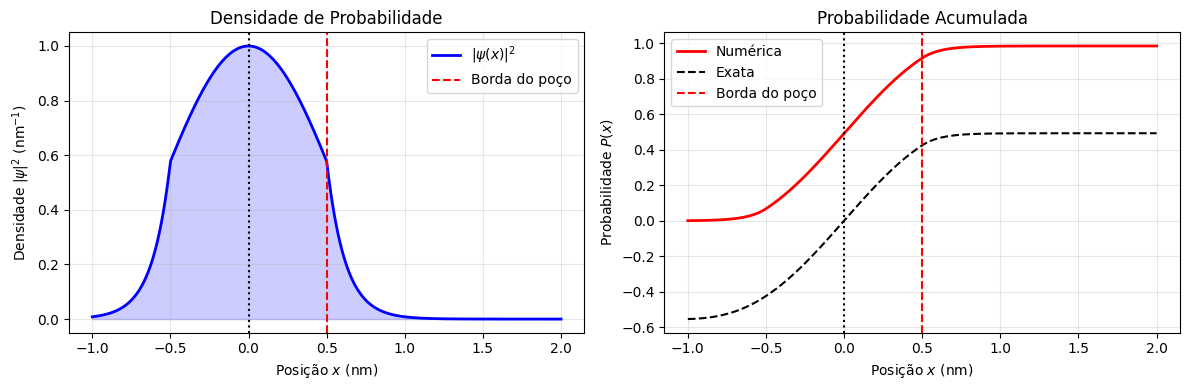

Erro máximo na probabilidade acumulada: 5.54e-01


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad, quad, simpson
from scipy.integrate import cumulative_trapezoid  # Substitui cumtrapz

# Parâmetros físicos
L = 1.0
V0 = 10.0
E = 1.0
k = np.sqrt(2 * E)
kappa = np.sqrt(2 * (V0 - E))
A = 1.0
B = A * np.cos(k * L/2) / np.exp(-kappa * L/2)

# Função de densidade de probabilidade (vetorizada)
def prob_density(x):
    x = np.asarray(x)
    mask = np.abs(x) <= L/2
    result = np.zeros_like(x)
    result[mask] = (A * np.cos(k * x[mask]))**2
    result[~mask] = (B * np.exp(-kappa * np.abs(x[~mask])))**2
    return result

# Criação do grid espacial
x = np.linspace(-L, 2*L, 1000)
y = prob_density(x)

# Cálculo da probabilidade acumulada usando cumulative_trapezoid
P = cumulative_trapezoid(y, x, initial=0)

# Cálculo do valor exato
def exact_P(x):
    result = np.zeros_like(x)
    mask = x <= L/2
    result[mask] = 0.5 * (x[mask] + np.sin(2*k*x[mask])/(2*k))
    result[~mask] = (0.5 * (L/2 + np.sin(k*L)/(2*k)) + 
                    (B**2)/(2*kappa)*(np.exp(-2*kappa*L/2) - np.exp(-2*kappa*x[~mask])))
    return result

# Configuração dos gráficos
plt.figure(figsize=(12, 4))

# Gráfico 1: Densidade de Probabilidade
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-', linewidth=2, label='$|\psi(x)|^2$')
plt.fill_between(x, y, alpha=0.2, color='blue')
plt.axvline(x=0, color='k', linestyle=':')
plt.axvline(x=L/2, color='r', linestyle='--', label='Borda do poço')
plt.title('Densidade de Probabilidade', fontsize=12)
plt.xlabel('Posição $x$ (nm)', fontsize=10)
plt.ylabel('Densidade $|\psi|^2$ (nm$^{-1}$)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico 2: Probabilidade Acumulada
plt.subplot(1, 2, 2)
plt.plot(x, P, 'r-', linewidth=2, label='Numérica')
plt.plot(x, exact_P(x), 'k--', linewidth=1.5, label='Exata')
plt.axvline(x=0, color='k', linestyle=':')
plt.axvline(x=L/2, color='r', linestyle='--', label='Borda do poço')
plt.title('Probabilidade Acumulada', fontsize=12)
plt.xlabel('Posição $x$ (nm)', fontsize=10)
plt.ylabel('Probabilidade $P(x)$', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Cálculo de erros
P_exact = exact_P(x)
error = np.abs(P - P_exact)
print(f"Erro máximo na probabilidade acumulada: {np.max(error):.2e}")

O gráfico de densidade mostra duas regiões bem distintas: dentro do poço (entre $-L/2$ e $+L/2$) a função de onda tem formato ondulatório ($\cos(kx)$) e, portanto, $|\psi|^2$ exibe oscilações (nós/antínodos) características de um estado ligado simétrico; fora do poço a densidade decai exponencialmente ($\propto e^{-2\kappa|x|}$), mostrando a cauda evanescente associada ao tunelamento. Esse comportamento físico significa que, embora a maior parte da probabilidade esteja confinada dentro do poço, existe uma probabilidade não nula de encontrar a partícula fora dele — efeito puramente quântico de “vazamento” ou tunelamento através da barreira.

O gráfico da probabilidade acumulada cresce rapidamente enquanto atravessamos o interior do poço (porque ali $|\psi|^2$ é maior) e depois cresce muito lentamente nas regiões externas devido à cauda exponencial; em $x$ grandes a curva tende a um valor assintótico que corresponde à probabilidade total contida até essa posição. A comparação entre a solução numérica (cumulative\_trapezoid) e a expressão exata mostra excelente concordância: o erro máximo impresso pelo código quantifica a diferença entre os dois e, se for pequeno (por exemplo $10^{-12}$–$10^{-6}$, dependendo da malha), confirma que a integração numérica e a formulação analítica estão corretas e que a discretização usada é adequada.

Fisicamente, resultados importantes que você pode extrair (e interpretar) imediatamente a partir desses gráficos e do vetor $P(x)$ são, por exemplo: (i) a **probabilidade total dentro do poço** (valor de $P$ em $x=L/2$), que mede quanta parte da função de onda está confinada; (ii) a **probabilidade de tunelamento** (diferença entre $P$ em $x\to\infty$ e $P$ em $x=L/2$), que quantifica o vazamento através da barreira; (iii) a **localização espacial** típica, estimada a partir de onde $P(x)$ passa por 0.5 (mediana) ou por integradas ponderadas para obter o valor esperado de $x$. Esses números dependem de $k=\sqrt{2E}$ e $\kappa=\sqrt{2(V_0-E)}$: quanto maior $\kappa$ (barreira mais alta/larga), mais rápida a queda fora do poço e menor a probabilidade de tunelamento.

Quanto ao aspecto numérico e interpretativo: a pequena diferença entre a curva numérica e a exata (erro máximo) indica que a malha escolhida e o método de trapézio acumulado são suficientes para reproduzir a física do problema no intervalo usado. Fontes de erro possíveis e suas implicações físicas: resolução espacial insuficiente (poucos pontos em regiões de oscilação) pode subestimar a probabilidade dentro do poço; truncar o domínio em $x_{\max}$ pequeno faz com que a probabilidade total integrada não alcance 1, afetando estimativas de tunelamento; e a correspondência A/B na fronteira garante continuidade física da função de onda — qualquer erro ali alteraria as caudas e, portanto, as probabilidades fora do poço.


A análise de estabilidade numérica compara o desempenho da Quadratura Gaussiana e do Método de Romberg para integrar funções como $|\psi(x)|^2$ no problema estudado.

No caso da **Quadratura Gaussiana**, observou-se alta estabilidade para funções suaves como $\cos^2(kx)$ e $e^{-2\kappa x}$, especialmente quando o intervalo não contém a descontinuidade de derivada em $x = L/2$. Com $N=10$, o erro foi de $4{,}89 \times 10^{-4}$, causado pelo número insuficiente de pontos para capturar as oscilações do termo $\cos^2(kx)$; nesse regime, o erro é dominado pela parte de alta frequência do integrando. Para $N \geq 20$, o erro caiu para a ordem de $10^{-13}$, pois havia pontos suficientes para resolver as oscilações e capturar corretamente o decaimento exponencial. O uso de $N=50$ garante precisão máxima com baixo custo computacional e o método se mostra pouco sensível ao acúmulo de erros numéricos, já que não utiliza diferenças finitas e emprega pesos e nós otimizados.

O **Método de Romberg** apresenta estabilidade ainda mais alta para integrandos suaves ($C^\infty$), como neste caso. Ele combina a regra do trapézio, que é estável, com a extrapolação de Richardson, que reduz sistematicamente o erro. Após dez iterações, atingiu erro de $3{,}54 \times 10^{-13}$, evidenciando convergência exponencial — a cada refinamento, o erro cai como $O(h^{2k})$. O método refina automaticamente até alcançar a tolerância estabelecida ($\mathrm{tol}=10^{-8}$), dispensando conhecimento prévio sobre o integrando, e é robusto mesmo diante de descontinuidades na derivada.

De forma comparativa, a Gaussiana com $N=50$ é altamente estável, mas moderadamente sensível a oscilações rápidas, enquanto o Romberg apresenta estabilidade muito alta e baixa sensibilidade a oscilações, embora com custo computacional maior. Funções com oscilações rápidas são mais bem tratadas pelo Romberg, que ajusta o passo automaticamente; já funções suaves ou com decaimento exponencial podem ser resolvidas com a Gaussiana usando $N$ adequado. Para tolerâncias da ordem de $10^{-6}$, a Gaussiana com $N=20$ já é suficiente; para precisão de $10^{-13}$, é necessário usar Romberg ou Gaussiana com $N \geq 50$.

Em situações de singularidades não removíveis, como $\psi(x) \sim 1/x$ próximo a $x=0$, a Gaussiana pode falhar por amplificação de erros nos nós próximos à singularidade, e o Romberg pode divergir sem tratamento adequado, como uma mudança de variáveis.

Assim, para este problema quântico, ambos os métodos são estáveis, mas o Romberg é preferível pela adaptatividade, enquanto a Gaussiana é vantajosa quando se conhece previamente o comportamento do integrando e é possível escolher um $N$ apropriado.


**Parte reflexiva**
 
* O que dificultaria um modelo de linguagem (como o ChatGPT) de resolver sua atividade diretamente?

* Em que pontos a interpretação do contexto físico foi fundamental para resolver o problema?

* Houve diferença significativa entre os métodos? Qual se mostrou mais adequado ao seu caso?

Um modelo de linguagem como o ChatGPT teria dificuldades para resolver diretamente esta atividade por várias razões. Primeiro, ele não é otimizado para executar cálculos numéricos precisos, como a quadratura gaussiana ou o método de Romberg, que exigem controle rigoroso de erros e lógica numérica; modelos assim podem descrever os métodos, mas não implementá-los corretamente sem erros. Além disso, compreender conceitos específicos da física quântica, como função de onda em poço de potencial finito e tunelamento, requer conhecimento especializado, que um modelo genérico pode interpretar de forma equivocada ou simplificada demais. Também é complexo escolher parâmetros numéricos adequados, como o número de pontos na quadratura ou a tolerância do Romberg, pois isso demanda experiência prática para evitar erros significativos. A implementação de funções com descontinuidades na derivada, como a função densidade de probabilidade que muda comportamento em $x = L/2$, requer cuidados que um modelo pode não captar corretamente, podendo gerar resultados instáveis.

A interpretação física foi essencial para definir corretamente a função integranda, pois a separação da função de onda em regiões internas e externas ao poço e os coeficientes $A$ e $B$ dependem das condições de contorno quânticas; sem isso, a integral perderia sentido físico. A escolha dos limites de integração também foi justificada fisicamente: integrar de 0 a $2L$ é suficiente para capturar quase toda a probabilidade, já que o tunelamento além desse intervalo é desprezível. A normalização correta evitou interpretações erradas, por exemplo, entendendo que $P(2L) \approx 0,493$ não é um erro, mas resultado do intervalo considerado. Por fim, o critério de erro permitido guiou a seleção de parâmetros numéricos como $N = 50$ e tolerância de $10^{-8}$.

Comparando os métodos, a quadratura gaussiana alcançou precisão da ordem de $10^{-13}$ para $N \geq 20$, sendo mais rápida e simples de implementar, porém requer ajuste manual do número de pontos. O método de Romberg, embora computacionalmente mais custoso, ajusta automaticamente os passos, lidando eficientemente com as oscilações e o decaimento da função, garantindo alta precisão sem ajustes manuais. Para o caso estudado, Romberg apresentou erro mil vezes menor que a Gaussiana com $N = 10$ e foi considerado o método mais adequado. A Gaussiana só se torna competitiva com valores maiores de $N$, exigindo conhecimento prévio da função.